In [182]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [183]:
# Cargar los datos
data = pd.read_csv('../abalone.csv',sep=";")

In [184]:
data.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,455,365,95,514,2245,101,15,15
1,M,35,265,9,2255,995,485,7,7
2,F,53,42,135,677,2565,1415,21,9
3,M,44,365,125,516,2155,114,155,10
4,I,33,255,8,205,895,395,55,7


In [185]:
# Convertir la variable categórica 'Sex' a una variable numérica
#data['Sex'] = data['Sex'].map({'M': 1, 'F': 0, 'I': 0.5})
data= pd.get_dummies(data)

In [186]:
# se cambia el tipo de varialbe de algunas columnas de float a int
data=data.astype({'Length':'int','Diameter':'int','Height':'int','Whole':'int','Shucked':'int',
                  'Viscera':'int','Shell':'int','Rings':'int'})
#convertimos las columnas necesarias de mm a metros y de gramos a kilogramos
data['Length']=data['Length']/1000
data['Diameter']=data['Diameter']/1000
data['Height']=data['Height']/1000

data['Whole']=data['Whole']/10000
data['Shucked']=data['Shucked']/10000
data['Viscera']=data['Viscera']/10000
data['Shell']=data['Shell']/10000

#data['Rings']=data['Rings']+1.5

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Length    4177 non-null   float64
 1   Diameter  4177 non-null   float64
 2   Height    4177 non-null   float64
 3   Whole     4177 non-null   float64
 4   Shucked   4177 non-null   float64
 5   Viscera   4177 non-null   float64
 6   Shell     4177 non-null   float64
 7   Rings     4177 non-null   int32  
 8   Sex_F     4177 non-null   uint8  
 9   Sex_I     4177 non-null   uint8  
 10  Sex_M     4177 non-null   uint8  
dtypes: float64(7), int32(1), uint8(3)
memory usage: 257.1 KB


### Regresion Logistica

In [188]:
# Separar las variables dependientes e independientes
X = data.drop('Rings', axis=1)
y = data['Rings']

In [189]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
# Crear un objeto de regresión logística
reg_logistica = LogisticRegression(solver='lbfgs',max_iter=1000)

# Ajustar el modelo con los datos de entrenamiento
reg_logistica.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [191]:
# Predecir los valores de la variable dependiente utilizando los datos de prueba
y_pred = reg_logistica.predict(X_test)

# Calcular la precisión del modelo utilizando la exactitud
precision = accuracy_score(y_test, y_pred)

print('La precisión del modelo es:', precision)

La precisión del modelo es: 0.21889952153110048


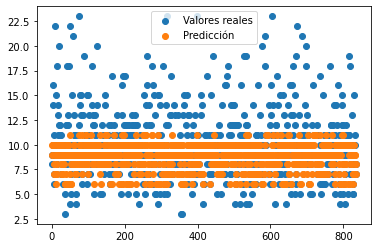

In [192]:
import matplotlib.pyplot as plt

# Graficar los valores reales y la predicción
plt.scatter(range(len(y_test)), y_test.values, label='Valores reales')
plt.scatter(range(len(y_test)), y_pred, label='Predicción')
plt.legend()
plt.show()

### Regresion Lineal

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
R_lineal=LinearRegression()
# Establecer la tasa de aprendizaje en 0.1
R_lineal.learning_rate = 0.2
R_lineal.fit(X_train, y_train)

LinearRegression()

In [195]:
y_pred_R_lineal= R_lineal.predict(X_test)

In [196]:
print('Score: ', R_lineal.score(X_test, y_test))

Score:  0.2792269657842692


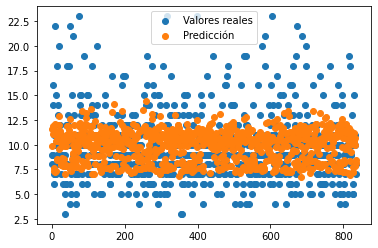

In [197]:
# Graficar los valores reales y la predicción
plt.scatter(range(len(y_test)), y_test.values, label='Valores reales')
plt.scatter(range(len(y_test)), y_pred_R_lineal, label='Predicción')
plt.legend()
plt.show()